In [6]:
import numpy as np
import pandas as pd
import re

In [7]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,not available,19.0,North,1 to 5 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']","['2 Wardrobe', '2 Bed', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Curtains', '1 Modular Kitchen', 'No AC', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Park', 'Shopping Centre']"


# 1. areaWithType

In [5]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1050,2.50,1557.0,Plot area 173(144.65 sq.m.)
1105,0.85,2300.0,Carpet area: 2300 (213.68 sq.m.)
3676,12.00,3240.0,Plot area 360(301.01 sq.m.)
3210,0.65,1365.0,Super Built up area 1365(126.81 sq.m.)
3643,4.00,2025.0,Built Up area: 225 (188.13 sq.m.)Carpet area: 180 sq.yards (150.5 sq.m.)


In [6]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [7]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [9]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [10]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3760,1.29,flat,1654.0,Super Built up area 1629(151.34 sq.m.)Carpet area: 1628 sq.ft. (151.25 sq.m.),1629.0,NaN,1628.0
941,2.30,flat,2300.0,Carpet area: 2290 (212.75 sq.m.),NaN,NaN,2290.0
1040,0.50,flat,645.0,Carpet area: 645 (59.92 sq.m.),NaN,NaN,645.0
1845,1.70,flat,1133.0,Carpet area: 1150 (106.84 sq.m.),NaN,NaN,1150.0
1885,0.85,flat,930.0,Super Built up area 930(86.4 sq.m.),930.0,NaN,NaN


In [11]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [12]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,0.70,house,999.0,Plot area 111(92.81 sq.m.),NaN,NaN,NaN
8,4.30,house,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 sq.ft. (13.47 sq.m.),NaN,145.0,NaN
9,24.00,house,400.0,Plot area 400(37.16 sq.m.),NaN,NaN,NaN
11,11.95,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
17,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,NaN,NaN


In [13]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [14]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [15]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,0.70,house,999.0,Plot area 111(92.81 sq.m.),NaN,NaN,NaN
9,24.00,house,400.0,Plot area 400(37.16 sq.m.),NaN,NaN,NaN
11,11.95,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
17,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,NaN,NaN
30,0.70,house,684.0,Plot area 684(63.55 sq.m.),NaN,NaN,NaN


In [16]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [17]:
all_nan_index

Int64Index([   7,    9,   11,   17,   30,   37,   52,   53,   55,   87,
            ...
            3717, 3718, 3727, 3731, 3746, 3759, 3761, 3778, 3782, 3796],
           dtype='int64', length=546)

In [18]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [19]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [20]:
all_nan_df.sample(10)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
915,0.65,house,585.0,Plot area 65(54.35 sq.m.),NaN,65.0,NaN
3020,3.25,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.0,NaN
523,0.53,house,363.0,Plot area 360(33.45 sq.m.),NaN,360.0,NaN
3435,2.25,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.0,NaN
1061,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
693,4.50,house,3150.0,Plot area 14(354.1 sq.m.),NaN,14.0,NaN
2917,8.49,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.0,NaN
2755,18.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.0,NaN
849,3.30,house,1728.0,Plot area 192(160.54 sq.m.),NaN,192.0,NaN
898,1.50,house,1300.0,Plot area 1300(120.77 sq.m.),NaN,1300.0,NaN


In [21]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [22]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [23]:
all_nan_df.sample(10)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1063,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,3400.0,NaN
1526,3.65,house,1557.0,Plot area 173(144.65 sq.m.),NaN,1557.0,NaN
2818,15.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,4500.0,NaN
30,0.70,house,684.0,Plot area 684(63.55 sq.m.),NaN,684.0,NaN
2758,1.60,house,558.0,Plot area 62(51.84 sq.m.),NaN,558.0,NaN
2752,5.60,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.0,NaN
3321,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN
3093,11.50,house,4680.0,Plot area 520(434.79 sq.m.),NaN,4680.0,NaN
3395,5.65,house,2367.0,Plot area 263(219.9 sq.m.),NaN,2367.0,NaN
2754,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.0,NaN


In [24]:
# update the original dataframe
df.update(all_nan_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [26]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,not available,19.0,North,1 to 5 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']","['2 Wardrobe', '2 Bed', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Curtains', '1 Modular Kitchen', 'No AC', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Park', 'Shopping Centre']",NaN,NaN,554.0
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,not available,3.0,South-West,1 to 5 Year Old,"['Sapphire 83 Mall', 'Delhi Jaipur Expressway', 'Dwarka Expressway', 'Agri Business Management Collage', 'Bharat Ram Global School', 'Singhania University, Manesar', 'Aarvy Healthcare Hospital', 'Garhi Harsaru Junction', 'Sphire Edge A N Buildwell', 'Holiday Inn Gurugram Sector 90']",NaN,"['Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Park', 'Piped-gas', 'Security Personnel', 'Shopping Centre', 'Rain Water Harvesting']",NaN,NaN,400.0
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,"study room,servant room",3.0,East,1 to 5 Year Old,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '3 Geyser', '17 Light', '1 Chimney', '4 AC', '1 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1650.0
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.),2,4,3+,study room,2.0,North-East,Under Construction,"['Dwarka Expressway', 'Adarsh public school,Garhi Harsaru', 'Excellere World School', 'PHC Garhi Harsaru', 'Aman Hospital & Surgical Centre', 'Garhi Harsaru Junction', 'Neemrana Palace']",NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,1350.0,1050.0
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,servant room,10.0,South-East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['5 Fan', '5 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No War

# 2.additionalRoom

In [27]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [28]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [29]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1554,study room,1,0,0,0,0
999,study room,1,0,0,0,0
1903,store room,0,0,1,0,0
330,servant room,0,1,0,0,0
456,not available,0,0,0,0,0


In [30]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,not available,19.0,North,1 to 5 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']","['2 Wardrobe', '2 Bed', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Curtains', '1 Modular Kitchen', 'No AC', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Park', 'Shopping Centre']",NaN,NaN,554.0,0,0,0,0,0
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,not available,3.0,South-West,1 to 5 Year Old,"['Sapphire 83 Mall', 'Delhi Jaipur Expressway', 'Dwarka Expressway', 'Agri Business Management Collage', 'Bharat Ram Global School', 'Singhania University, Manesar', 'Aarvy Healthcare Hospital', 'Garhi Harsaru Junction', 'Sphire Edge A N Buildwell', 'Holiday Inn Gurugram Sector 90']",NaN,"['Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Park', 'Piped-gas', 'Security Personnel', 'Shopping Centre', 'Rain Water Harvesting']",NaN,NaN,400.0,0,0,0,0,0
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,"study room,servant room",3.0,East,1 to 5 Year Old,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '3 Geyser', '17 Light', '1 Chimney', '4 AC', '1 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1650.0,1,1,0,0,0
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.),2,4,3+,study room,2.0,North-East,Under Construction,"['Dwarka Expressway', 'Adarsh public school,Garhi Harsaru', 'Excellere World School', 'PHC Garhi Harsaru', 'Aman Hospital & Surgical Centre', 'Garhi Harsaru Junction', 'Neemrana Palace']",NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,1350.0,1050.0,1,0,0,0,0
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,servant room,10.0,South-East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['5 Fan', '5 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser

# 3.agePossession

In [31]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Dec 2025                 7
Jun 2024                 7
Aug 2023                 7
Nov 2023                 5
Sep 2023                 4
Jul 2024                 4
By 2025                  4
Aug 2024                 4
Oct 2023                 4
May 2024                 3
Nov 2024                 3
Feb 2024                 3
Jan 2025                 3
By 2027                  2
Jun 2027                 2
Sep 2025                 2
Dec 2026                 2
Jul 2027                 2
Oct 2025                 2
Mar 2025                 2
Aug 2025                 2
Jul 2025                 2
J

In [32]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [33]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [34]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

In [35]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,not available,19.0,North,Relatively New,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']","['2 Wardrobe', '2 Bed', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Curtains', '1 Modular Kitchen', 'No AC', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Park', 'Shopping Centre']",NaN,NaN,554.0,0,0,0,0,0
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,not available,3.0,South-West,Relatively New,"['Sapphire 83 Mall', 'Delhi Jaipur Expressway', 'Dwarka Expressway', 'Agri Business Management Collage', 'Bharat Ram Global School', 'Singhania University, Manesar', 'Aarvy Healthcare Hospital', 'Garhi Harsaru Junction', 'Sphire Edge A N Buildwell', 'Holiday Inn Gurugram Sector 90']",NaN,"['Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Park', 'Piped-gas', 'Security Personnel', 'Shopping Centre', 'Rain Water Harvesting']",NaN,NaN,400.0,0,0,0,0,0
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,"study room,servant room",3.0,East,Relatively New,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '3 Geyser', '17 Light', '1 Chimney', '4 AC', '1 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1650.0,1,1,0,0,0
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.),2,4,3+,study room,2.0,North-East,Under Construction,"['Dwarka Expressway', 'Adarsh public school,Garhi Harsaru', 'Excellere World School', 'PHC Garhi Harsaru', 'Aman Hospital & Surgical Centre', 'Garhi Harsaru Junction', 'Neemrana Palace']",NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,1350.0,1050.0,1,0,0,0,0
4,flat,bptp terra,sector 37d,1.72,7850.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,servant room,10.0,South-East,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['5 Fan', '5 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', '

# 4.furnishDetails

In [36]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1519,NaN,"['Power Back-up', 'Security / Fire Alarm', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
77,[],"['Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
183,NaN,NaN
1656,"['1 Wardrobe', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Park', 'Maintenance Staff', 'Visitor Parking']"
3563,"['3 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '21 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [37]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [38]:
furnishings_df.shape

(3803, 19)

In [39]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_10672\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [40]:
furnishings_df.sample(5)

,Chimney,Wardrobe,Curtains,Fridge,Exhaust Fan,TV,Washing Machine,Light,Water Purifier,Sofa,AC,Fan,Stove,Bed,Geyser,Dining Table,Microwave,Modular Kitchen
3534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2832,1,3,0,0,1,0,0,8,0,0,0,6,0,0,3,0,0,1


In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Lets build k means clustering algorithm so that we can devide furnished column to some categories**

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [102]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

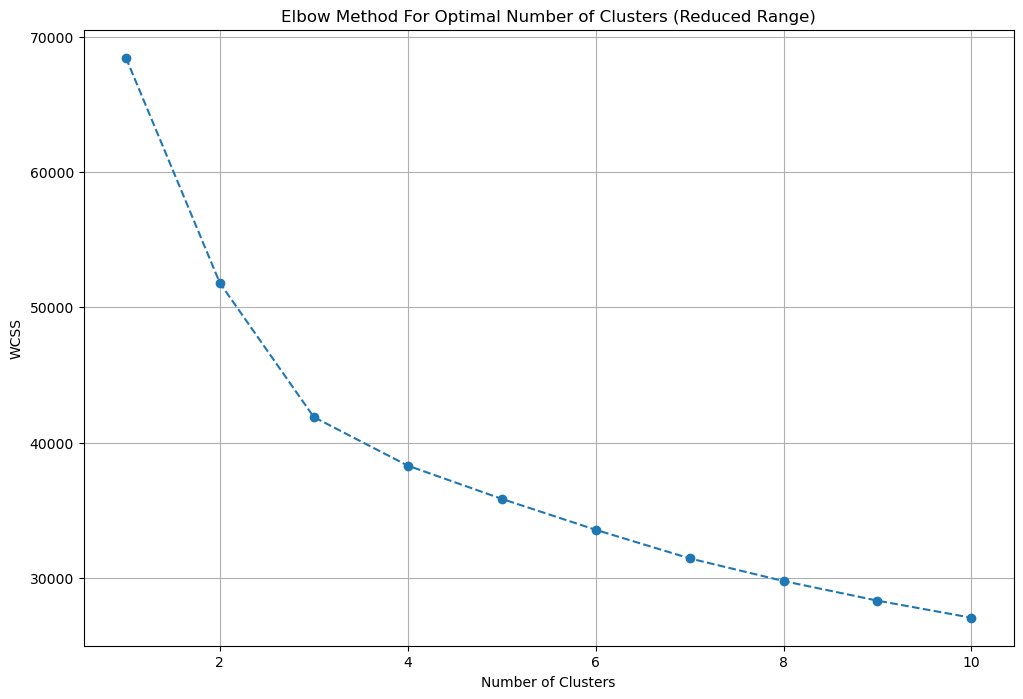

In [103]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [104]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [49]:
df = df.iloc[:,:-18]

In [105]:
df['furnishing_type'] = cluster_assignments

In [111]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3488,"['1 Water Purifier', '10 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', '4 Bed', '5 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No Stove', 'No TV']",2
2692,NaN,1
3234,"['3 Wardrobe', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
1859,[],1
2604,"['4 Wardrobe', '6 Fan', '2 Geyser', '12 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1


# 5.features

In [112]:
df[['society','features']].sample(5)

,society,features
2743,signature andour heights,"['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal']"
711,umang monsoon breeze,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff']"
3096,green campus chs,"['Feng Shui / Vaastu Compliant', 'Piped-gas']"
1233,smart world orchard,NaN
1183,signature andour heights,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Park']"


In [113]:
df['features'].isnull().sum()

635

In [114]:
import pandas as pd
app_df = pd.read_csv(r"C:\Users\Prabhu\Downloads\real_estate_data - real_estate_data.csv")
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [115]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [116]:
temp_df = df[df['features'].isnull()]

In [117]:
temp_df.shape

(635, 26)

In [122]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')[['TopFacilities']]

In [123]:
df.loc[temp_df.index,'features'] = x.values

In [124]:
df['features'].isnull().sum()

481

**Lets try the same method which we had used for furnished column to make categories for the column**

In [125]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [126]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [127]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2655,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
253,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0


In [128]:
features_binary_df.shape

(3803, 130)

In [129]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

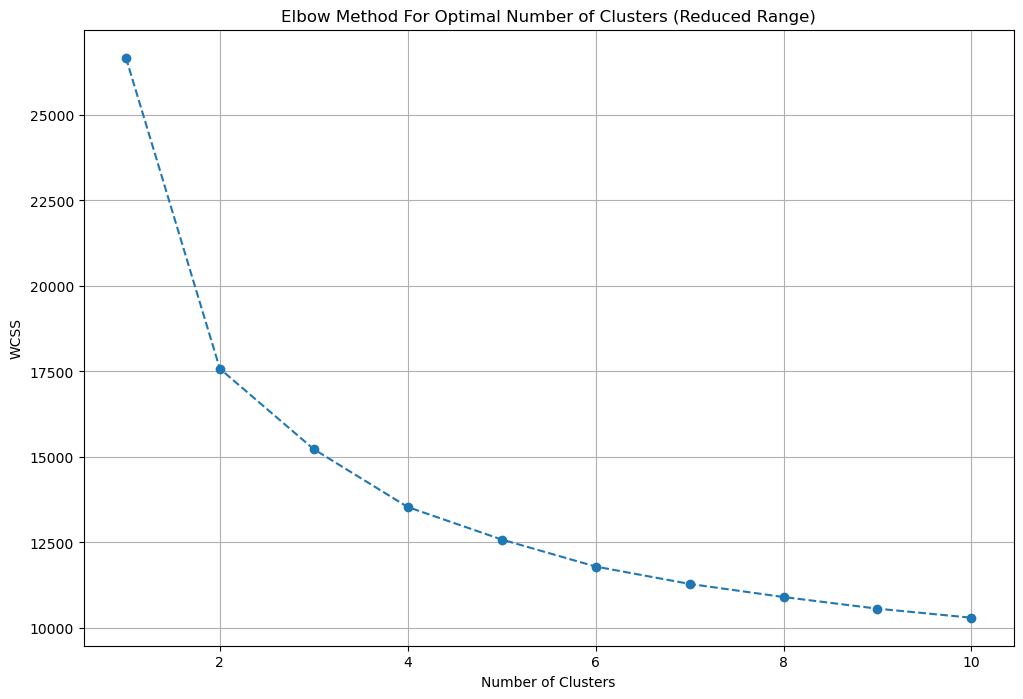

In [130]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**This is making only two clusters and also not making the proper categories so we will try another approach**

# Luxury Rating approach

In [137]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [138]:
df['luxury_score'] = luxury_score

In [139]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),2,2,2,not available,19.0,North,Relatively New,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']","['2 Wardrobe', '2 Bed', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Curtains', '1 Modular Kitchen', 'No AC', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Park', 'Shopping Centre']",NaN,NaN,554.0,0,0,0,0,0,0,"[Power Back-up, Lift(s), Maintenance Staff, Park, Shopping Centre]",21
1,flat,signature global synera,sector 81,0.38,9500.0,400.0,Carpet area: 400 (37.16 sq.m.),1,1,2,not available,3.0,South-West,Relatively New,"['Sapphire 83 Mall', 'Delhi Jaipur Expressway', 'Dwarka Expressway', 'Agri Business Management Collage', 'Bharat Ram Global School', 'Singhania University, Manesar', 'Aarvy Healthcare Hospital', 'Garhi Harsaru Junction', 'Sphire Edge A N Buildwell', 'Holiday Inn Gurugram Sector 90']",NaN,"['Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Park', 'Piped-gas', 'Security Personnel', 'Shopping Centre', 'Rain Water Harvesting']",NaN,NaN,400.0,0,0,0,0,0,1,"[Lift(s), Maintenance Staff, False Ceiling Lighting, Park, Piped-gas, Security Personnel, Shopping Centre, Rain Water Harvesting]",43
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,"study room,servant room",3.0,East,Relatively New,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '3 Geyser', '17 Light', '1 Chimney', '4 AC', '1 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1650.0,1,1,0,0,0,0,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Visitor Parking, Swimming Pool, Park, Security Personnel, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",124
3,flat,vatika xpressions,sector 88b,1.10,8148.0,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.),2,4,3+,study room,2.0,North-East,Under Construction,"['Dwarka Expressway', 'Adarsh public school,Garhi Harsaru', 'Excellere World School', 'PHC Garhi Harsaru', 'Aman Hospital & Surgical Centre', 'Garhi Harsaru Junction', 'Neemrana Palace']",NaN,"['Feng Shui / Vaas

In [140]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [141]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2425,house,independent,sector 3 phase 3 extension,1.50,5000.0,3000.0,Built Up area: 3000 (278.71 sq.m.),6,1,0,1.0,NaN,New Property,NaN,3000.0,NaN,0,0,0,0,0,1,0
631,flat,dlf regal gardens,sector 90,1.13,6647.0,1700.0,Super Built up area 1730(160.72 sq.m.),3,3,3+,8.0,North,Relatively New,1730.0,NaN,NaN,0,0,0,0,1,1,72
422,flat,m3m sierra 68,sector 68,1.10,8986.0,1224.0,Super Built up area 1224(113.71 sq.m.)Built Up area: 1150 sq.ft. (106.84 sq.m.)Carpet area: 830 sq.ft. (77.11 sq.m.),2,2,3,1.0,North-East,Relatively New,1224.0,1150.0,830.0,0,0,0,0,0,0,127
2916,flat,dlf belvedere towers,sector 25,3.40,13765.0,2470.0,Carpet area: 2470 (229.47 sq.m.),4,4,3,1.0,South-East,Old Property,NaN,NaN,2470.0,0,1,0,0,0,1,26
997,flat,godrej aria,sector 79,1.10,7772.0,1415.0,Super Built up area 1351(125.51 sq.m.),2,2,3+,4.0,North-East,New Property,1351.0,NaN,NaN,0,0,0,0,0,0,49


In [142]:
df.shape

(3803, 23)

In [143]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)